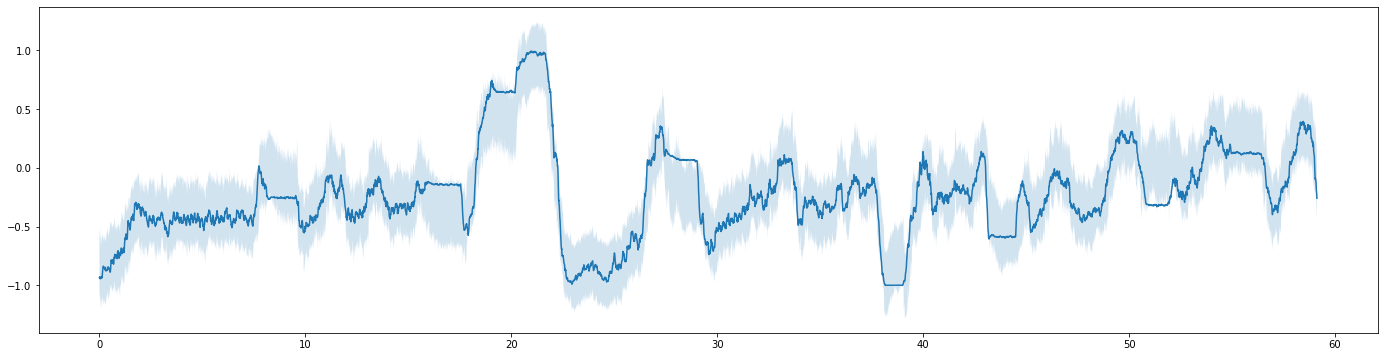

In [9]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import torch

def prediction_intervals(pred, label):
    confidence_level = 0.95
    residuals = label - pred

    # Calculate the prediction intervals using quantiles
    lower_quantile = (1 - confidence_level) / 2
    upper_quantile = 1 - lower_quantile
    lower_bounds = np.quantile(residuals, lower_quantile) + pred
    upper_bounds = np.quantile(residuals, upper_quantile) + pred
    return lower_bounds, upper_bounds

fold_path = os.getcwd() 
model_type = "trans" # ["lstm","hlstm","arx","trans"]
window_size = 100
time_step = 1
cricket_number = "c21"
input_pattern = "pattern1" # ["pattern1(All)","pattern2(ThC+2FTi hind leg)","pattern3(THC)"]

# get the directon data from the csv file
direction_path = fold_path + "/Evaluation/Results/"+ model_type+"_"+str(window_size)+"_"+str(time_step)+"_"+cricket_number+"_Direction_"+input_pattern+".csv"
direction = pd.read_csv(direction_path, usecols=[1,2,3,4])
direction = np.array(direction)
pred_direction_x, pred_direction_y = direction[:,0], direction[:,1]
label_direction_x, label_direction_y = direction[:,2], direction[:,3]

end = len(label_direction_x) * 1/119.88
t_test = np.arange(0, end, 1/119.88) 
lower_bounds_x, upper_bounds_x = prediction_intervals(pred_direction_x, label_direction_x)
lower_bounds_y, upper_bounds_y = prediction_intervals(pred_direction_y, label_direction_y)

plt.figure(figsize=(24, 6))
plt.plot(t_test, label_direction_x, label='Predictions')
plt.fill_between(t_test, lower_bounds_x, upper_bounds_x, alpha=0.2, label='Prediction Intervals')

# plt.figure(figsize=(12, 3))
# plt.plot(t_test,label_test[:,0],label='Original data',c='blue',linewidth=2)
# plt.plot(t_test,pred_test[:,0],label='Prediction',c='red',linestyle='--',linewidth=2)
# plt.xticks(fontsize=14)  
# plt.yticks(fontsize=14)
# plt.xlabel('Time t [s]',fontsize=14)
# plt.ylabel('Direction_x [vec]',fontsize=14)
# plt.title('Direction_x_'+cricket_number,fontsize=14)
#plt.savefig(fold_path + "/Evaluation/Results/" + model_type + "_" + str(window_size) + "_" + str(time_step) + "_" + cricket_number + "_Direction_x_" + input_pattern +  ".png",bbox_inches = 'tight')
#plt.legend(fontsize=14)